In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm

%run ../Scripts/trajectory.py
%run ../Scripts/trajectoryVisual.py
%run ../Scripts/trajsTree.py
%run ../Scripts/supMethods.py
%run ../Scripts/formulas.py
foldername = "../Data_Cas_Protein_Large_5"

In [83]:
foldername = "../Data_Cas_Protein_Large_5"
Np_list = np.arange(1, 1000, 5)
seed_lizt = [0]
fitness_list_50 = []
fitness_err_list_50 = []
Entropy_list = []
Entropy_err_list = []

for i in Np_list:
    folder = foldername + f"/Np_{i}_seed0"
    params, sim_params = read_json(folder, False)
    single_fitness = scipy.sparse.load_npz(folder+f"/sp_frame_f0.npz").todok()
    single_n = scipy.sparse.load_npz(folder+f"/sp_frame_n0.npz").todok()
    single_norm_fitness = norm_fitness(single_fitness, single_n, params, sim_params)

    x_ind, y_ind = single_norm_fitness.nonzero()
    non_zero_elements = single_fitness[x_ind, y_ind].toarray()
    fitness_list_50.append(np.mean(non_zero_elements))
    fitness_err_list_50.append(np.var(non_zero_elements))

In [84]:
foldername = "../Data_Cas_Protein_Large_6"
Np_list = np.arange(1, 1000, 5)
seed_lizt = [0]
fitness_list_100 = []
fitness_err_list_100 = []
Entropy_list = []
Entropy_err_list = []

for i in Np_list:
    folder = foldername + f"/Np_{i}_seed0"
    params, sim_params = read_json(folder, False)
    single_fitness = scipy.sparse.load_npz(folder+f"/sp_frame_f0.npz").todok()
    single_n = scipy.sparse.load_npz(folder+f"/sp_frame_n0.npz").todok()
    single_norm_fitness = norm_fitness(single_fitness, single_n, params, sim_params)

    x_ind, y_ind = single_norm_fitness.nonzero()
    non_zero_elements = single_fitness[x_ind, y_ind].toarray()
    fitness_list_100.append(np.mean(non_zero_elements))
    fitness_err_list_100.append(np.var(non_zero_elements))

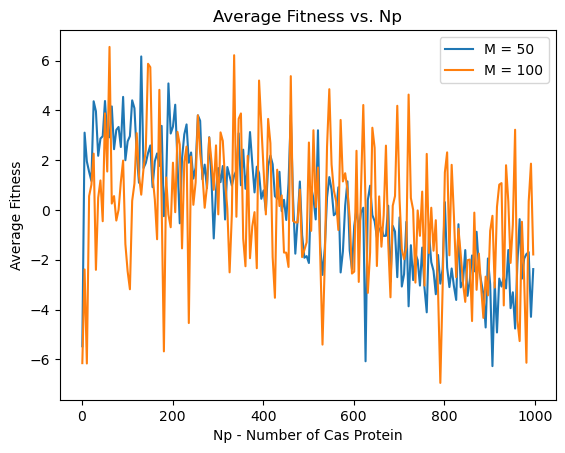

In [85]:
plt.plot(Np_list, fitness_list_50 - np.mean(fitness_list_50), label = "M = 50")
plt.plot(Np_list, fitness_list_100 - np.mean(fitness_list_100), label = "M = 100")
plt.title("Average Fitness vs. Np")
plt.xlabel("Np - Number of Cas Protein")
plt.ylabel("Average Fitness")
plt.legend()

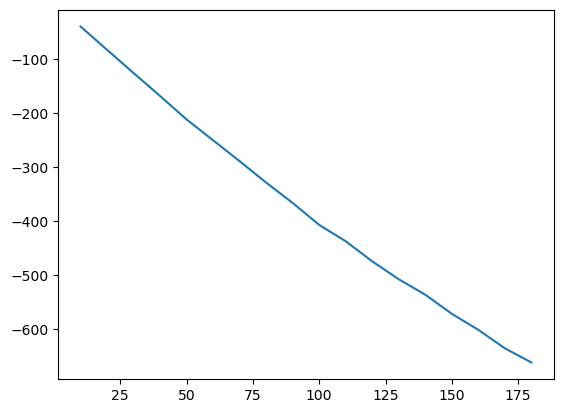

In [88]:
foldername = "../Data_Memory_Size_large"
M_list = np.arange(10, 184, 10)
seed_lizt = [0]
fitness_list_Np = []
fitness_err_list_Np = []
Entropy_list = []
Entropy_err_list = []

for M in M_list:
    folder = foldername + f"/M_{M}_seed0"
    single_fitness = scipy.sparse.load_npz(folder+f"/sp_frame_f0.npz").todok()
    single_n = scipy.sparse.load_npz(folder+f"/sp_frame_n0.npz").todok()
    single_norm_fitness = norm_fitness(single_fitness, single_n, params, sim_params)

    x_ind, y_ind = single_norm_fitness.nonzero()
    non_zero_elements = single_fitness[x_ind, y_ind].toarray()
    fitness_list_Np.append(np.mean(non_zero_elements))
    fitness_err_list_Np.append(np.var(non_zero_elements))

plt.plot(M_list, fitness_list_Np)